# Decision Tree - Penguins Classifier

## 1. Import Modules and Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import LabelEncoder

For this notebook we will use the <a href="https://archive.ics.uci.edu/dataset/690/palmer+penguins-3" >Palmer Penguins of UCI from ALLISON HORST github Repository</a>, where we will classifier three penguin species: Adelie, Chinstrap, and Gentoo, with features such as bill length, flipper length, body mass, and sex. 

In [2]:
df = pd.read_csv("penguins.csv")

In [3]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007

In [4]:
df.tail()

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Chinstrap  Dream            55.8           19.8              207.0   
340  Chinstrap  Dream            43.5           18.1              202.0   
341  Chinstrap  Dream            49.6           18.2              193.0   
342  Chinstrap  Dream            50.8           19.0              210.0   
343  Chinstrap  Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
339       4000.0    male  2009  
340       3400.0  female  2009  
341       3775.0    male  2009  
342       4100.0    male  2009  
343       3775.0  female  2009

## 2. Data Exploration, Cleaning, Encoding and Wrangling

After loading the data, the first step is always to get an idea of what the data looks like and how it's structured. That should give us an idea on how to clean it, as well as what models to use. 

## Data exploration

In [5]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [6]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [7]:
df['sex'].unique()

array(['male', 'female', nan], dtype=object)

In [8]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

## Dealing with missing data

Some entries are incomplete, and are NaN value. To facilitate downstream analysis, we have to find and deal with the missing data.
In this case, we will drop the whole sample with missing data.

In [9]:
df = df.dropna()
# df = df.astype(float)

## Split data into dependent and independent variables

In [10]:
X = df.drop('species', axis=1)
y = df['species']

print(f"Dataset shape: {X.shape}, Label distribution:\n{y.value_counts()}")

Dataset shape: (333, 7), Label distribution:
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


## Dealing with string data

In [11]:
le_species = LabelEncoder()
y = le_species.fit_transform(y)


In [12]:
# Encode 'sex'
le_sex = LabelEncoder()
X['sex'] = le_sex.fit_transform(X['sex'])

# One-Hot encode 'island'
X = pd.get_dummies(X, columns=['island'])

In [13]:
X.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex  year  \
0            39.1           18.7              181.0       3750.0    1  2007   
1            39.5           17.4              186.0       3800.0    0  2007   
2            40.3           18.0              195.0       3250.0    0  2007   
4            36.7           19.3              193.0       3450.0    0  2007   
5            39.3           20.6              190.0       3650.0    1  2007   

   island_Biscoe  island_Dream  island_Torgersen  
0          False         False              True  
1          False         False              True  
2          False         False              True  
4          False         False              True  
5          False         False              True

In [14]:
X.tail()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex  year  \
339            55.8           19.8              207.0       4000.0    1  2009   
340            43.5           18.1              202.0       3400.0    0  2009   
341            49.6           18.2              193.0       3775.0    1  2009   
342            50.8           19.0              210.0       4100.0    1  2009   
343            50.2           18.7              198.0       3775.0    0  2009   

     island_Biscoe  island_Dream  island_Torgersen  
339          False          True             False  
340          False          True             False  
341          False          True             False  
342          False          True             False  
343          False          True             False

In [15]:
X.dtypes

bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
year                   int64
island_Biscoe           bool
island_Dream            bool
island_Torgersen        bool
dtype: object

## 3. Prepare Train/Test Splits

In [16]:
subsets = []
split_ratios = [0.4, 0.6, 0.8, 0.9] 

In [17]:
for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=ratio, stratify=y, shuffle=True, random_state=42
    )
    subsets.append((X_train, X_test, y_train, y_test))

## Visualize label distribution

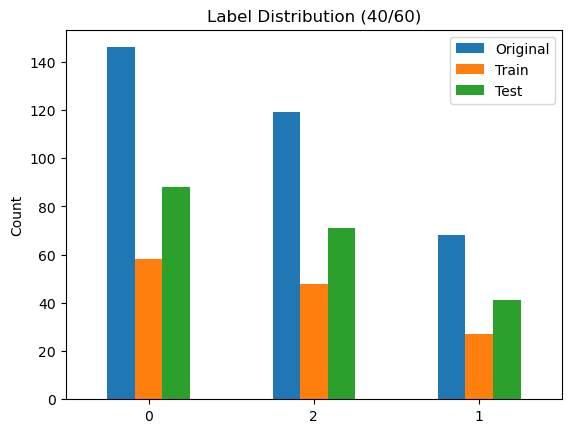

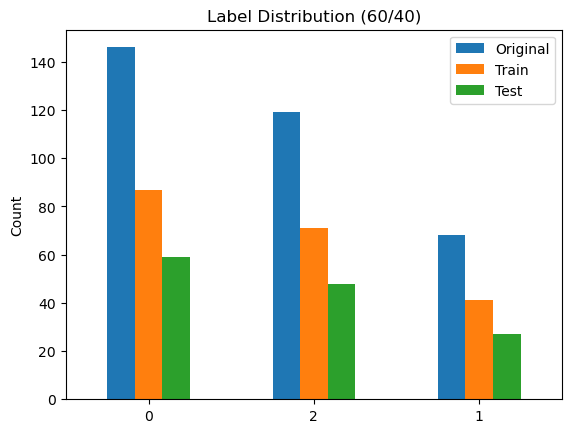

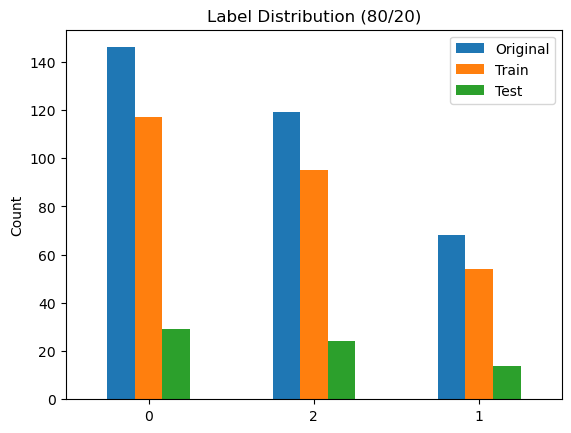

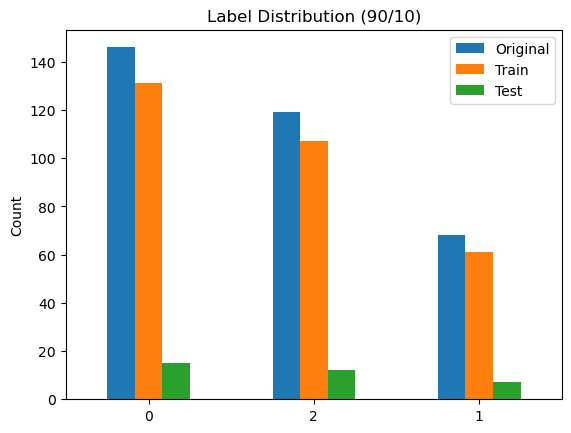

In [18]:
def plot_label_distribution(y_original, y_train, y_test, title):
    counts = pd.DataFrame({
        'Original': pd.Series(y_original).value_counts(),
        'Train': pd.Series(y_train).value_counts(),
        'Test': pd.Series(y_test).value_counts()
    })
    counts.plot(kind='bar', rot=0)
    plt.title(title)
    plt.ylabel('Count')
    plt.show()

for idx, (X_train, X_test, y_train, y_test) in enumerate(subsets):
    title = f"Label Distribution ({int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)})"
    plot_label_distribution(y, y_train, y_test, title)

## 4. Train Decision Trees

## Building the decision tree classifier

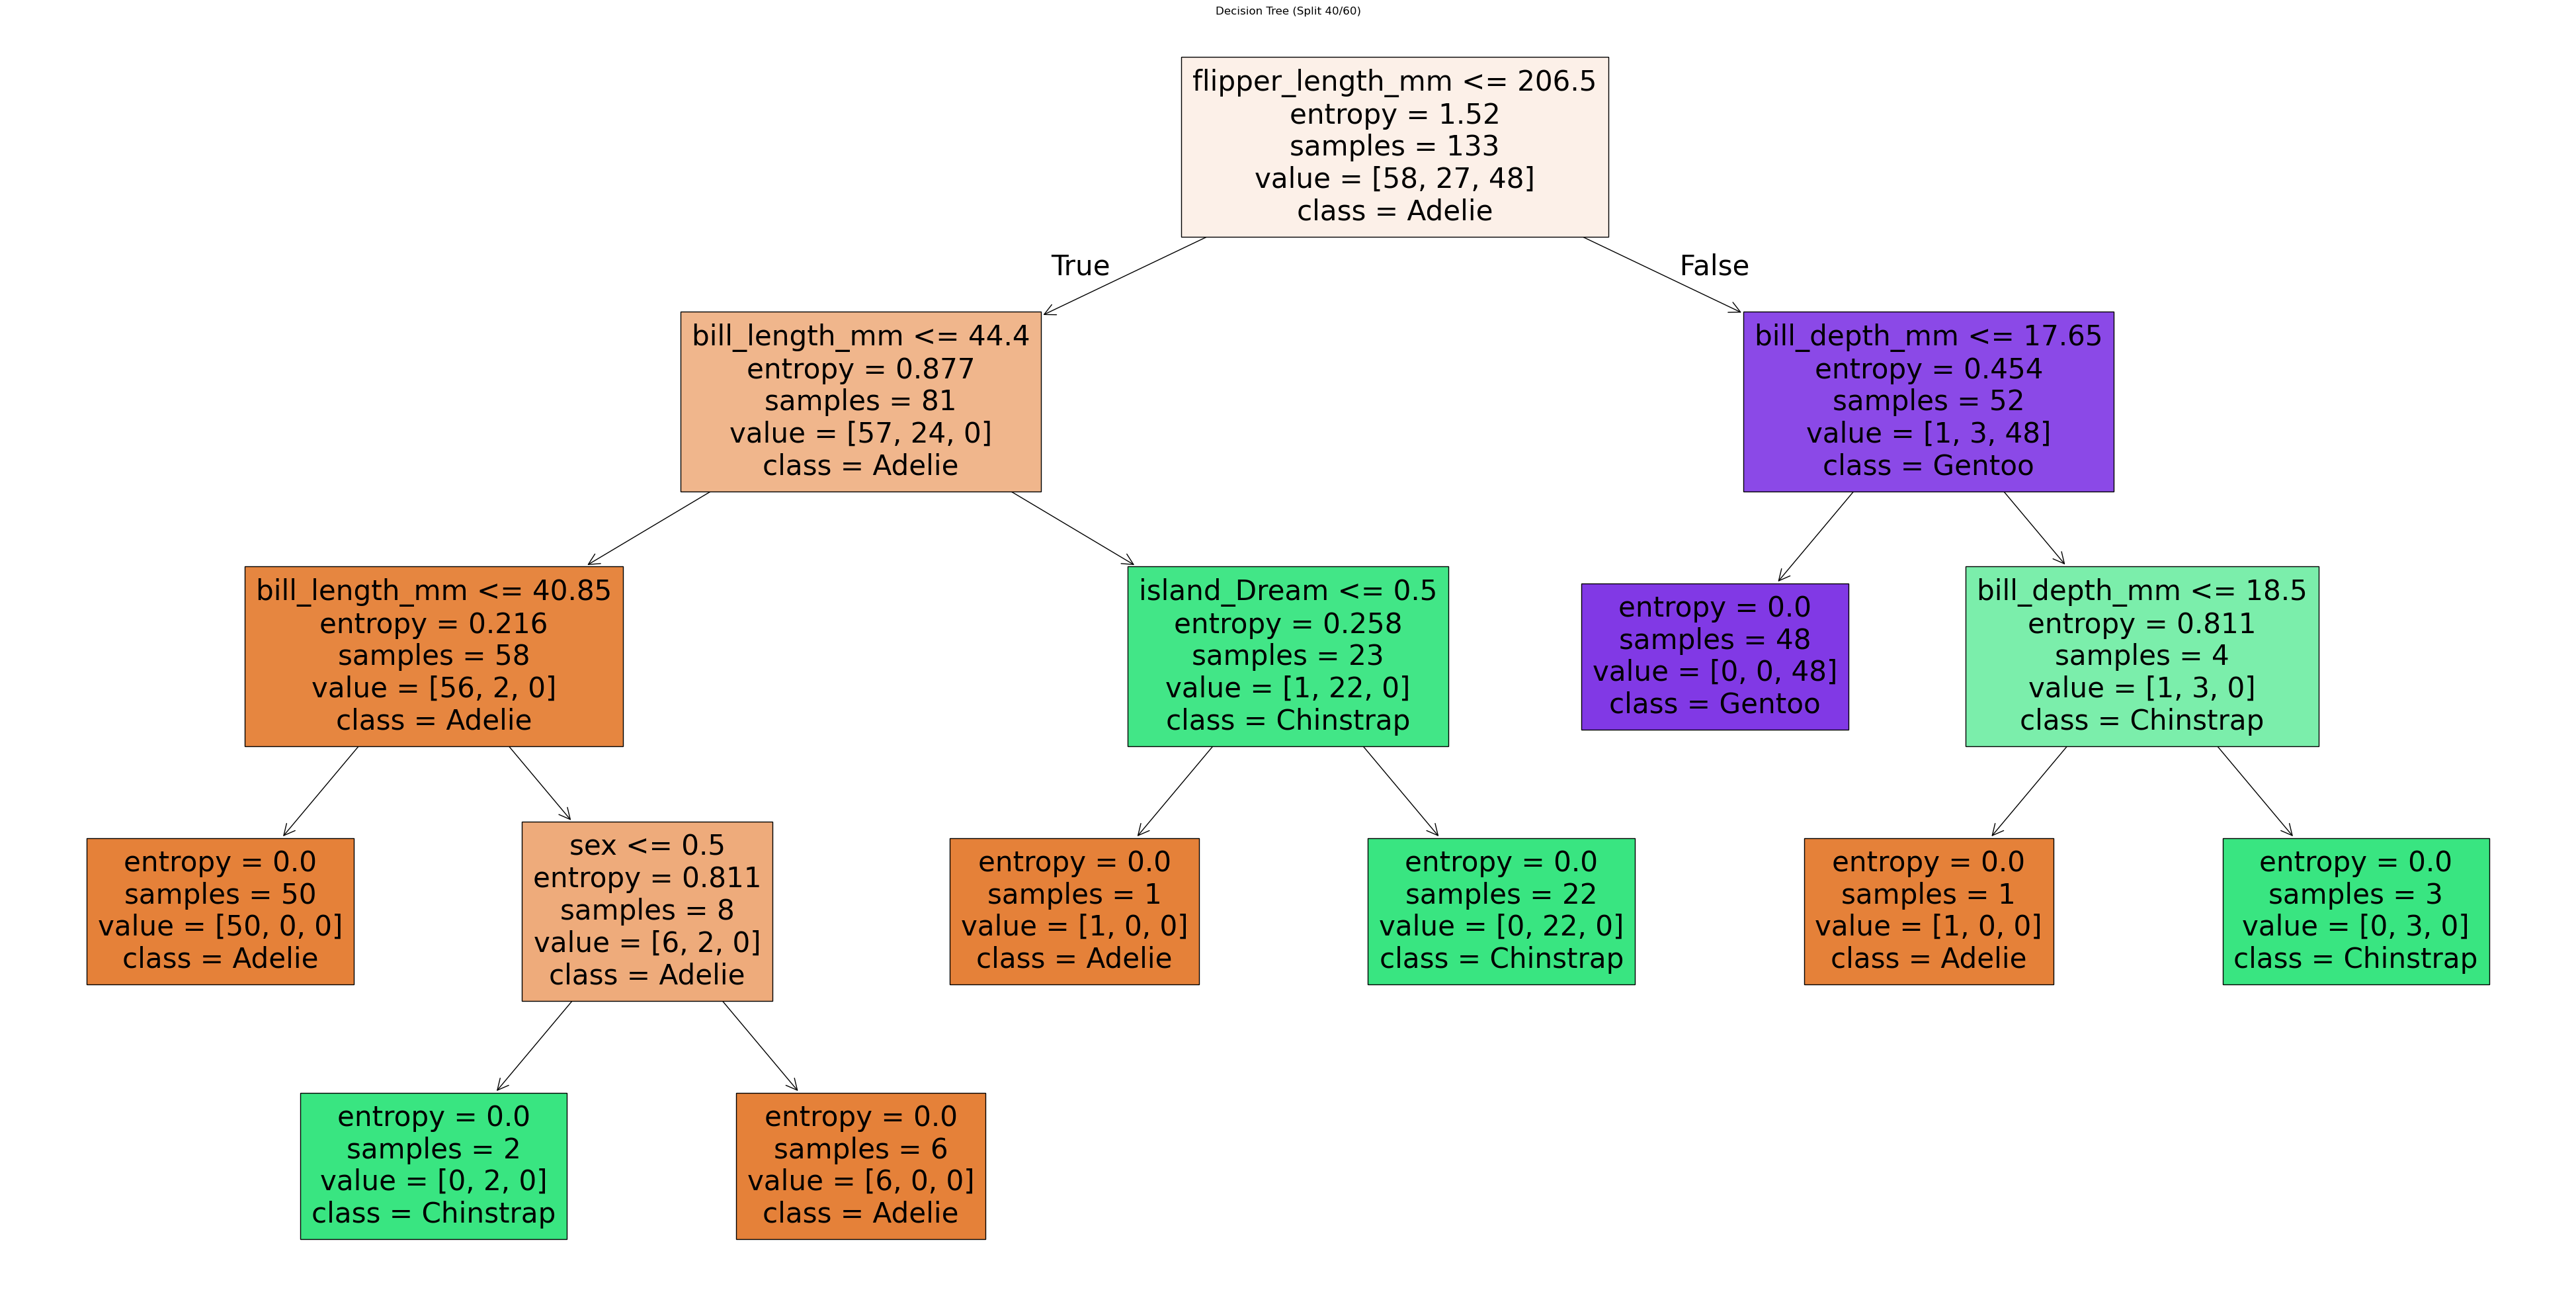

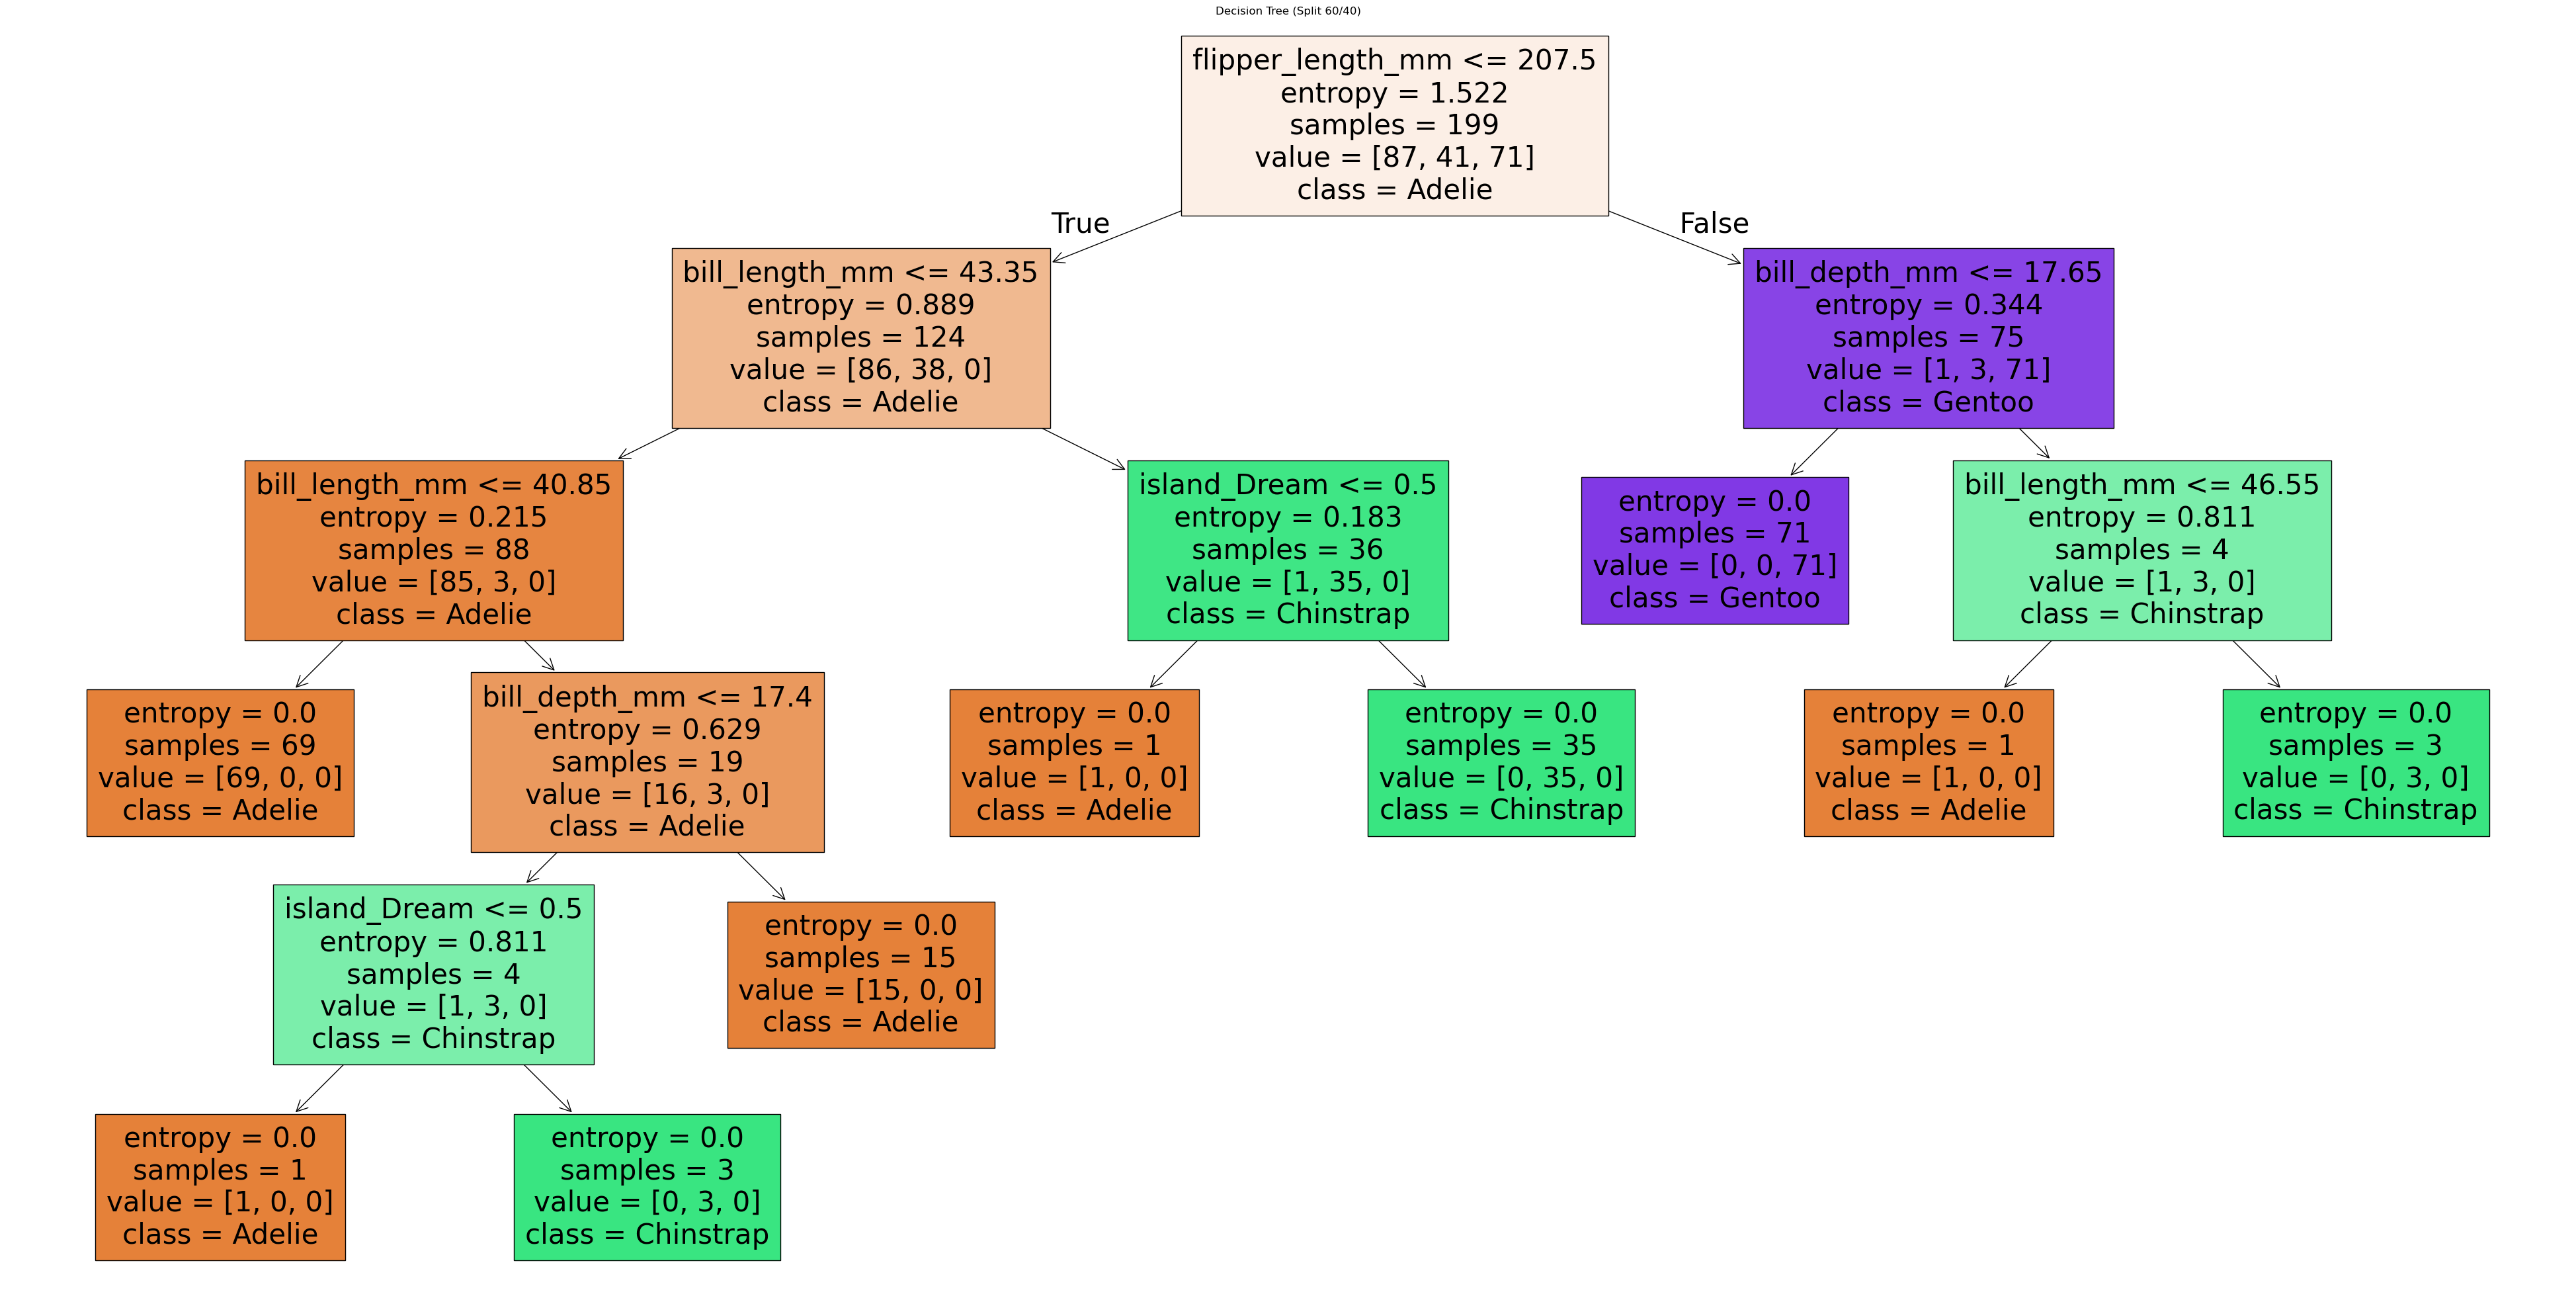

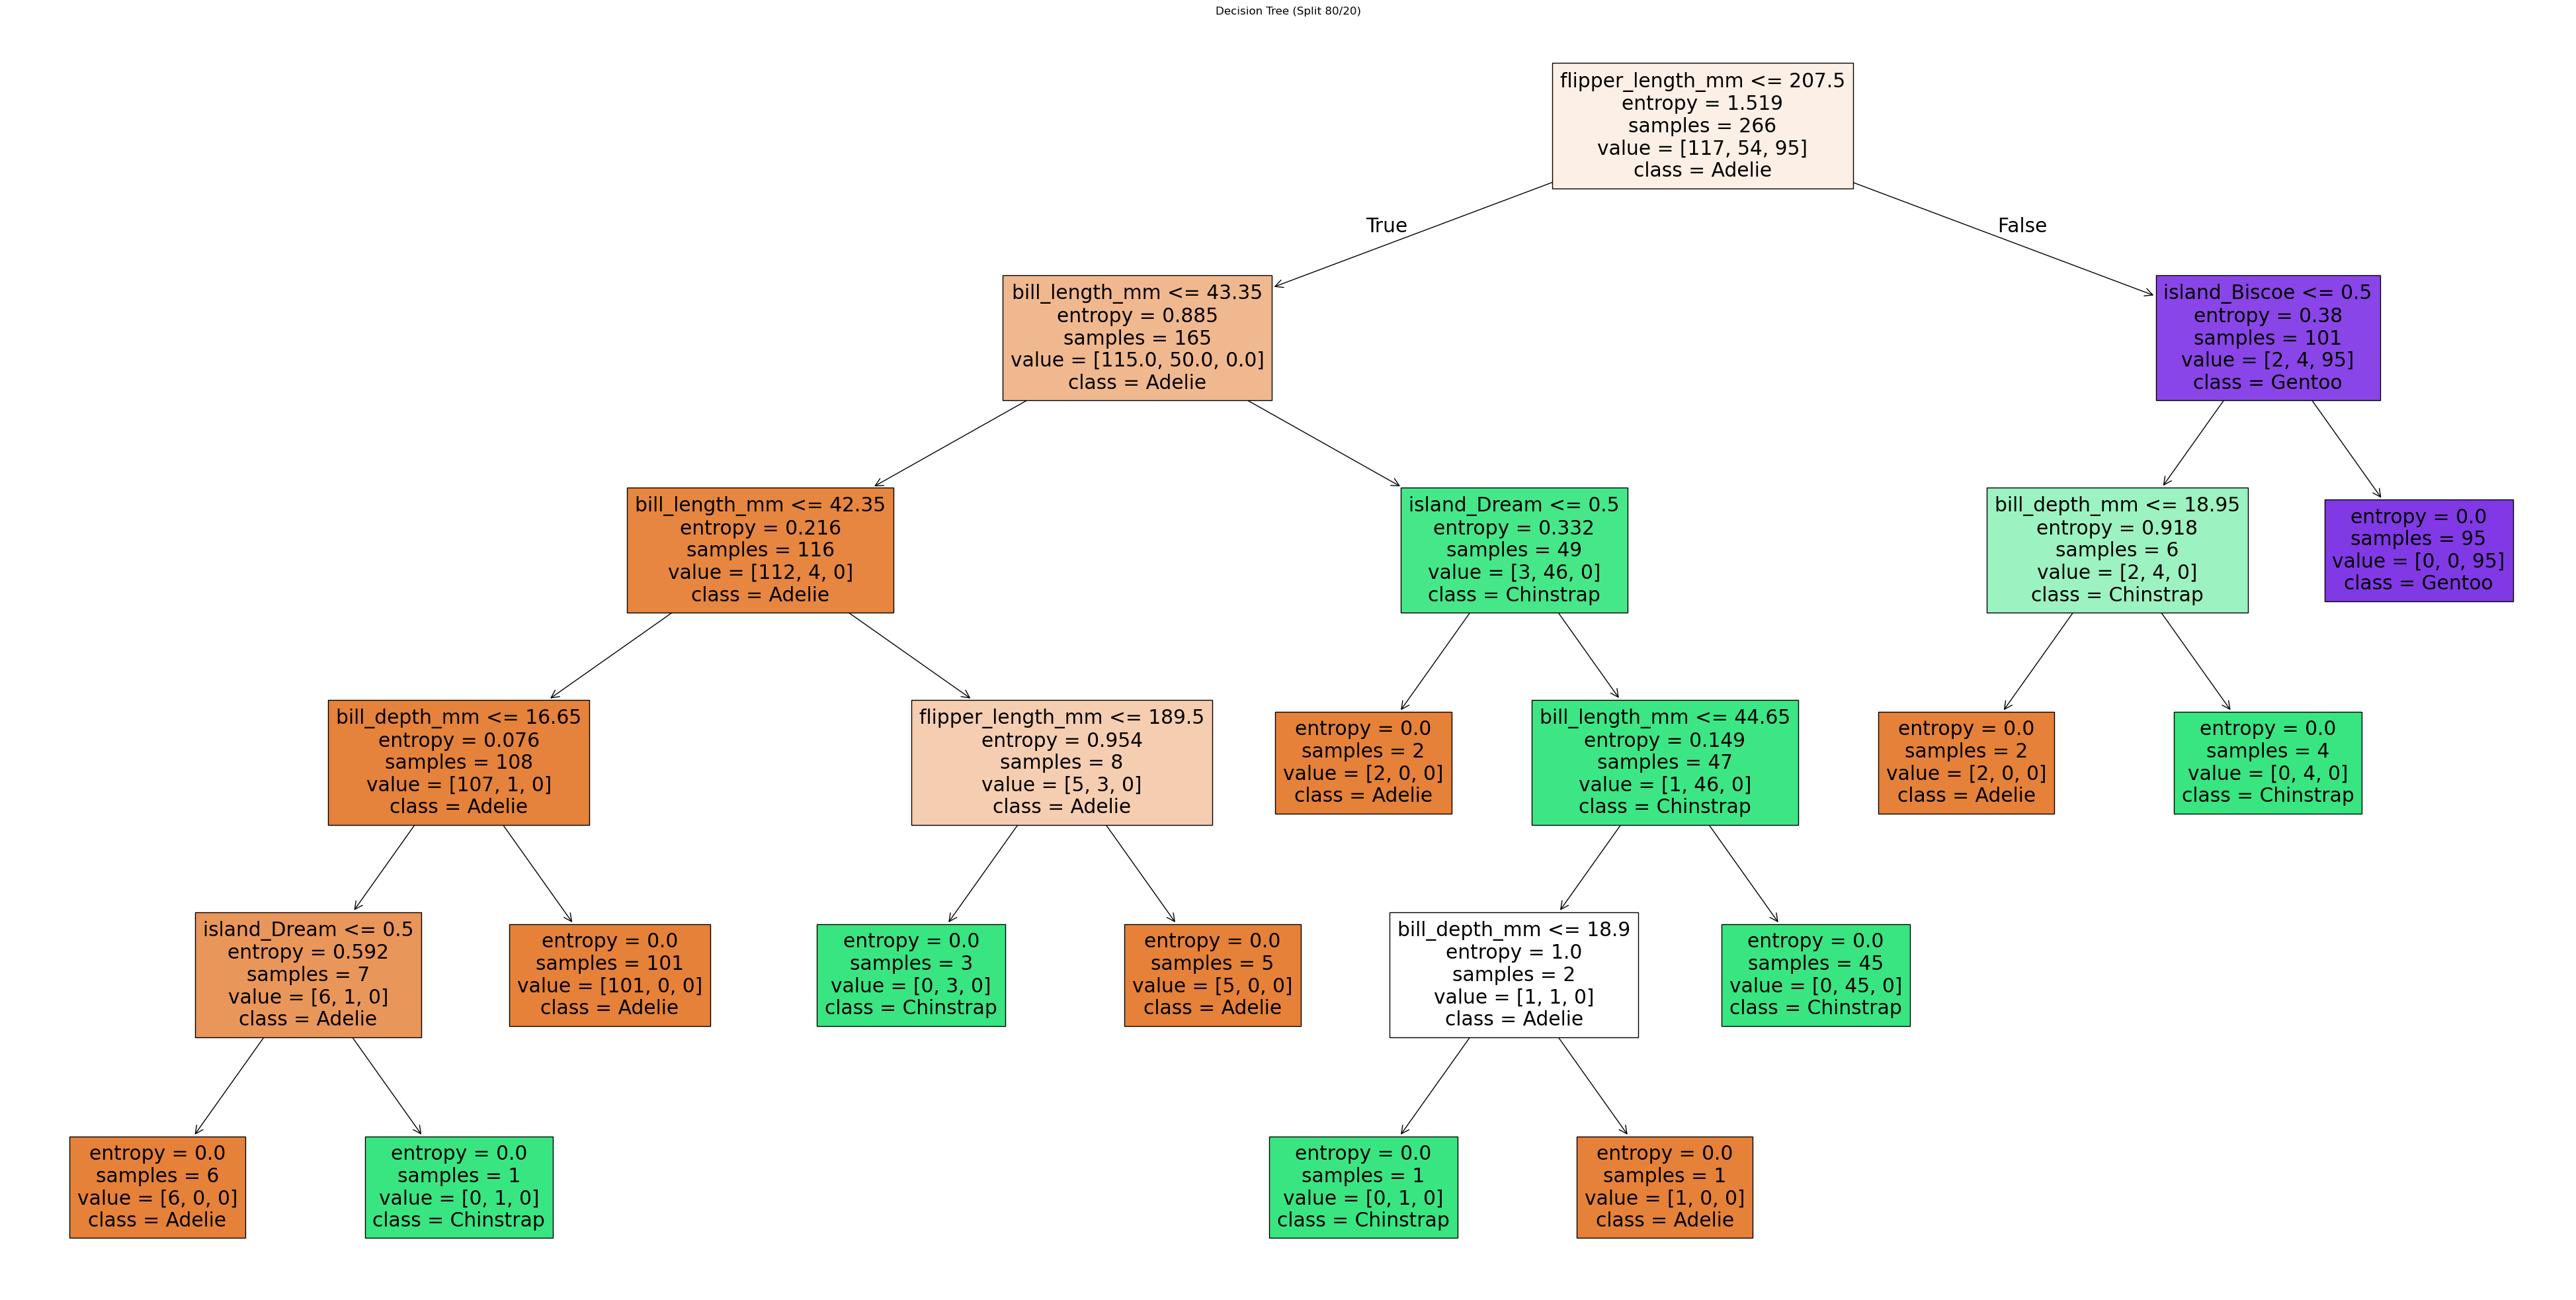

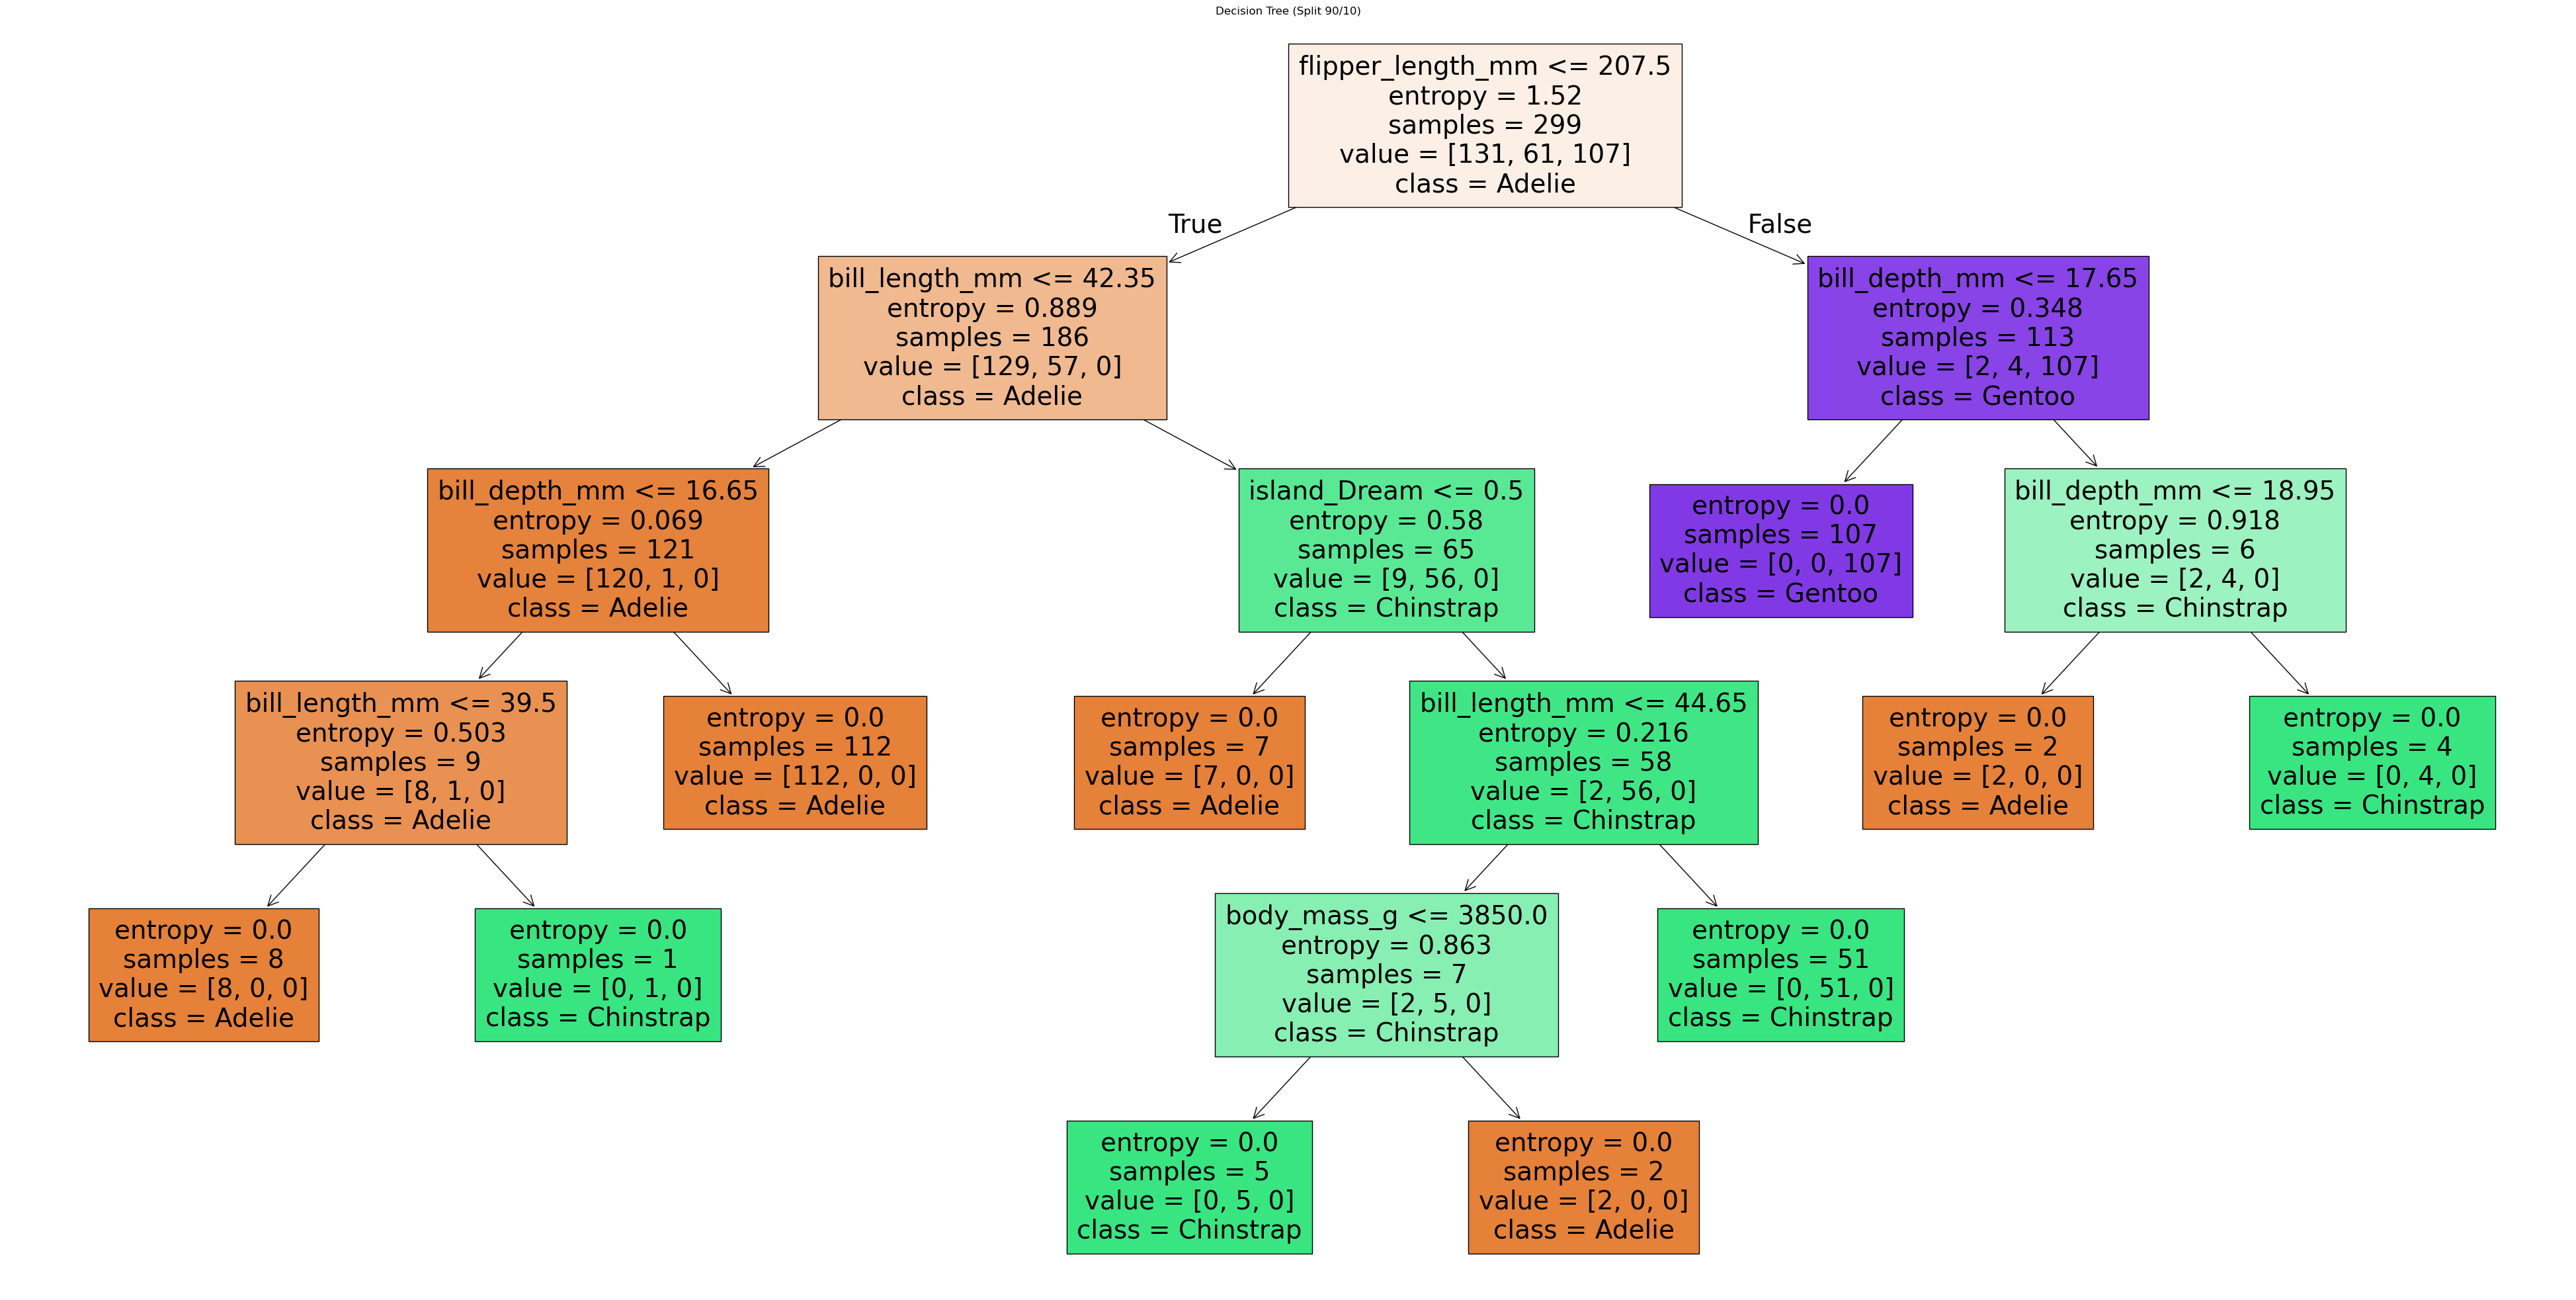

In [19]:
trees = []

for idx, (X_train, X_test, y_train, y_test) in enumerate(subsets):
    clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    clf.fit(X_train, y_train)
    trees.append((clf, X_train, X_test, y_train, y_test))

    # Plot tree (first none levels)
    plt.figure(figsize=(50,25))
    plot_tree(clf, feature_names=X.columns, class_names=le_species.classes_, filled=True, max_depth=None)
    plt.title(f"Decision Tree (Split {int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)})")
    plt.show()

## 5. Evaluating the decision tree classifier

### Evaluation Metrics Formulas:

- **Precision**:
  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall**:
  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1-Score**:
  $$
  F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

- **Accuracy**:
  $$
  \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Samples}}
  $$


=== Evaluation for split 40/60 ===
              precision    recall  f1-score   support

      Adelie       0.99      0.95      0.97        88
   Chinstrap       0.91      1.00      0.95        41
      Gentoo       1.00      0.99      0.99        71

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200



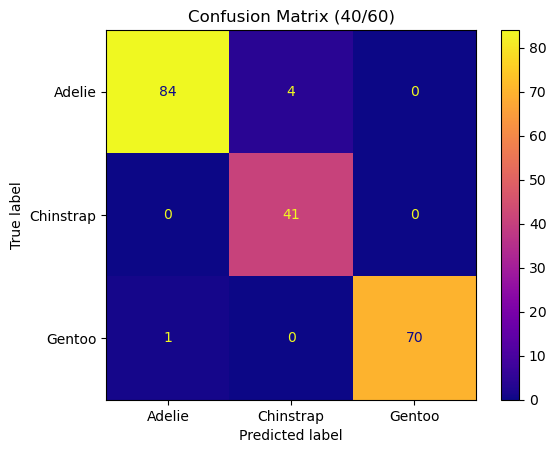

=== Evaluation for split 60/40 ===
              precision    recall  f1-score   support

      Adelie       0.97      0.98      0.97        59
   Chinstrap       0.96      1.00      0.98        27
      Gentoo       1.00      0.96      0.98        48

    accuracy                           0.98       134
   macro avg       0.98      0.98      0.98       134
weighted avg       0.98      0.98      0.98       134



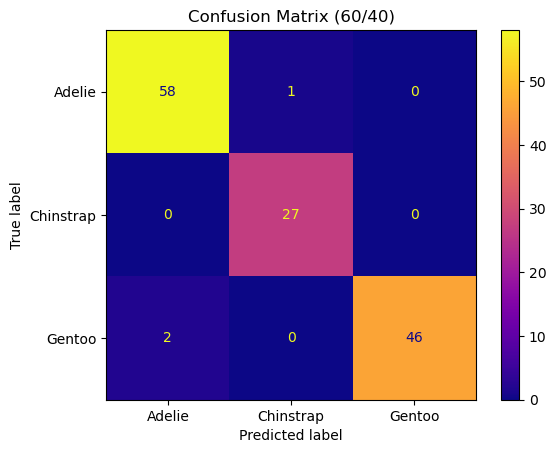

=== Evaluation for split 80/20 ===
              precision    recall  f1-score   support

      Adelie       0.93      0.90      0.91        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67



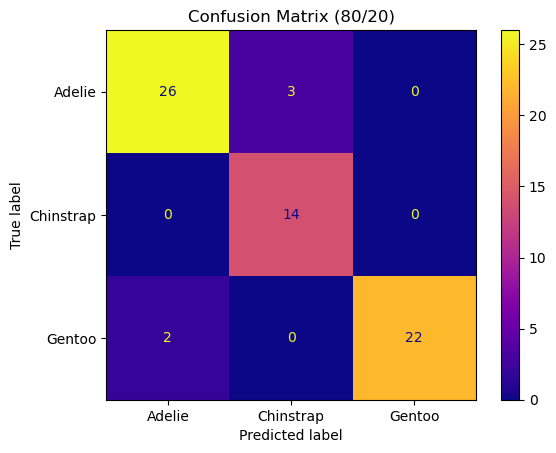

=== Evaluation for split 90/10 ===
              precision    recall  f1-score   support

      Adelie       0.88      1.00      0.94        15
   Chinstrap       1.00      1.00      1.00         7
      Gentoo       1.00      0.83      0.91        12

    accuracy                           0.94        34
   macro avg       0.96      0.94      0.95        34
weighted avg       0.95      0.94      0.94        34



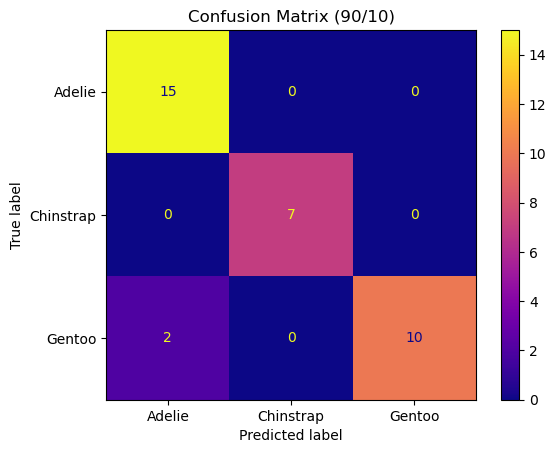

In [20]:
for idx, (clf, X_train, X_test, y_train, y_test) in enumerate(trees):
    y_pred = clf.predict(X_test)
    print(f"=== Evaluation for split {int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)} ===")
    print(classification_report(y_test, y_pred, target_names=le_species.classes_))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=le_species.classes_)
    disp.plot(cmap='plasma')
    plt.title(f"Confusion Matrix ({int(split_ratios[idx]*100)}/{int(100-split_ratios[idx]*100)})")
    plt.show()

## 6. The depth and accuracy of a decision tree

We will visualize how the depth of the decision tree affects classification accuracy focus on 80/20 training and test sets

In [21]:
X_train, X_test, y_train, y_test = subsets[2]  # 80/20 split

depths = [None, 2, 3, 4, 5, 6, 7]
accuracies = []

## Train decision trees on the 80/20 split dataset with varying depths.

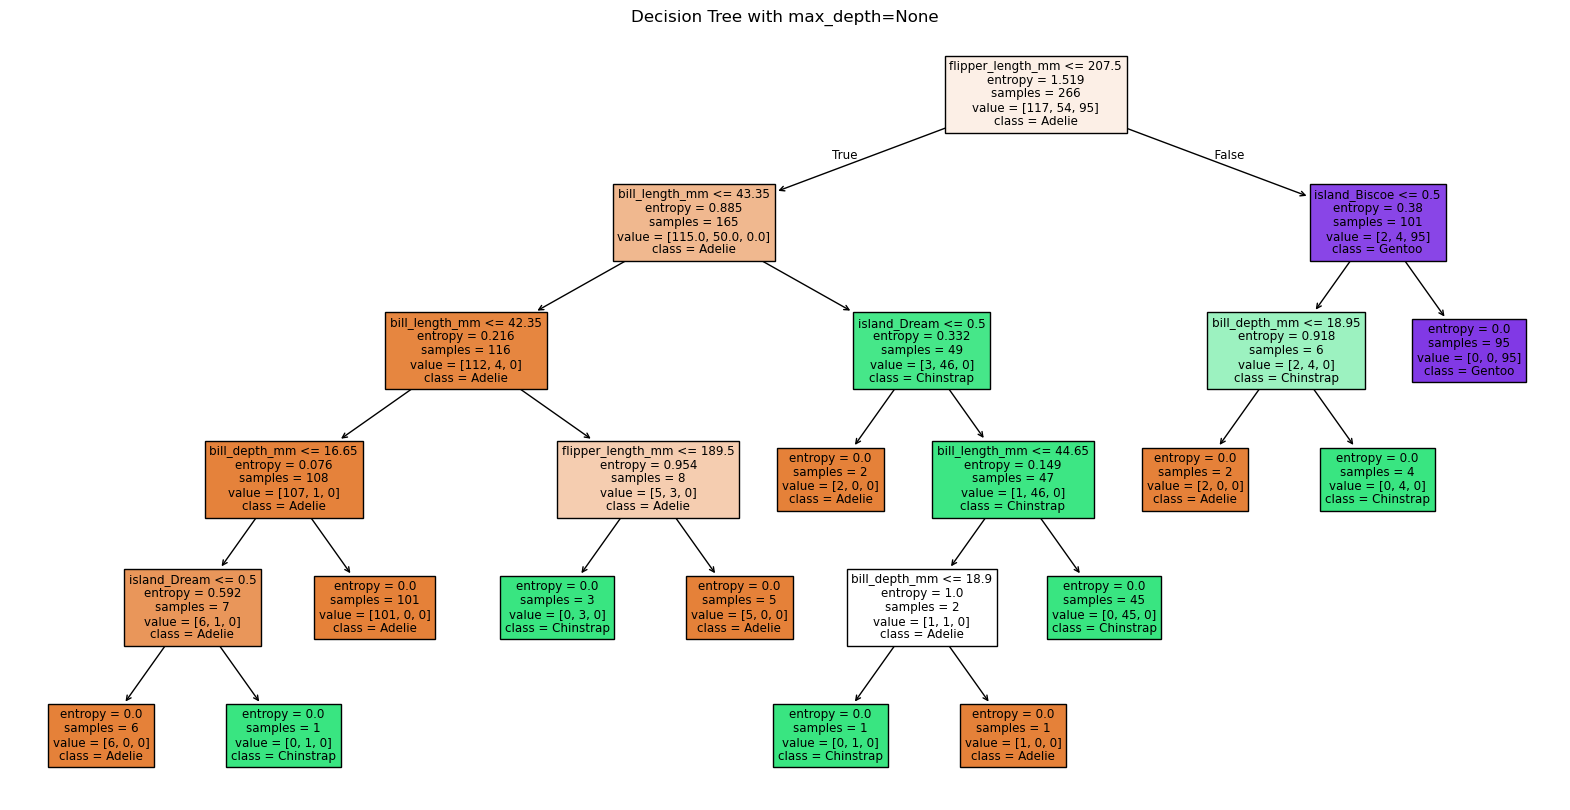

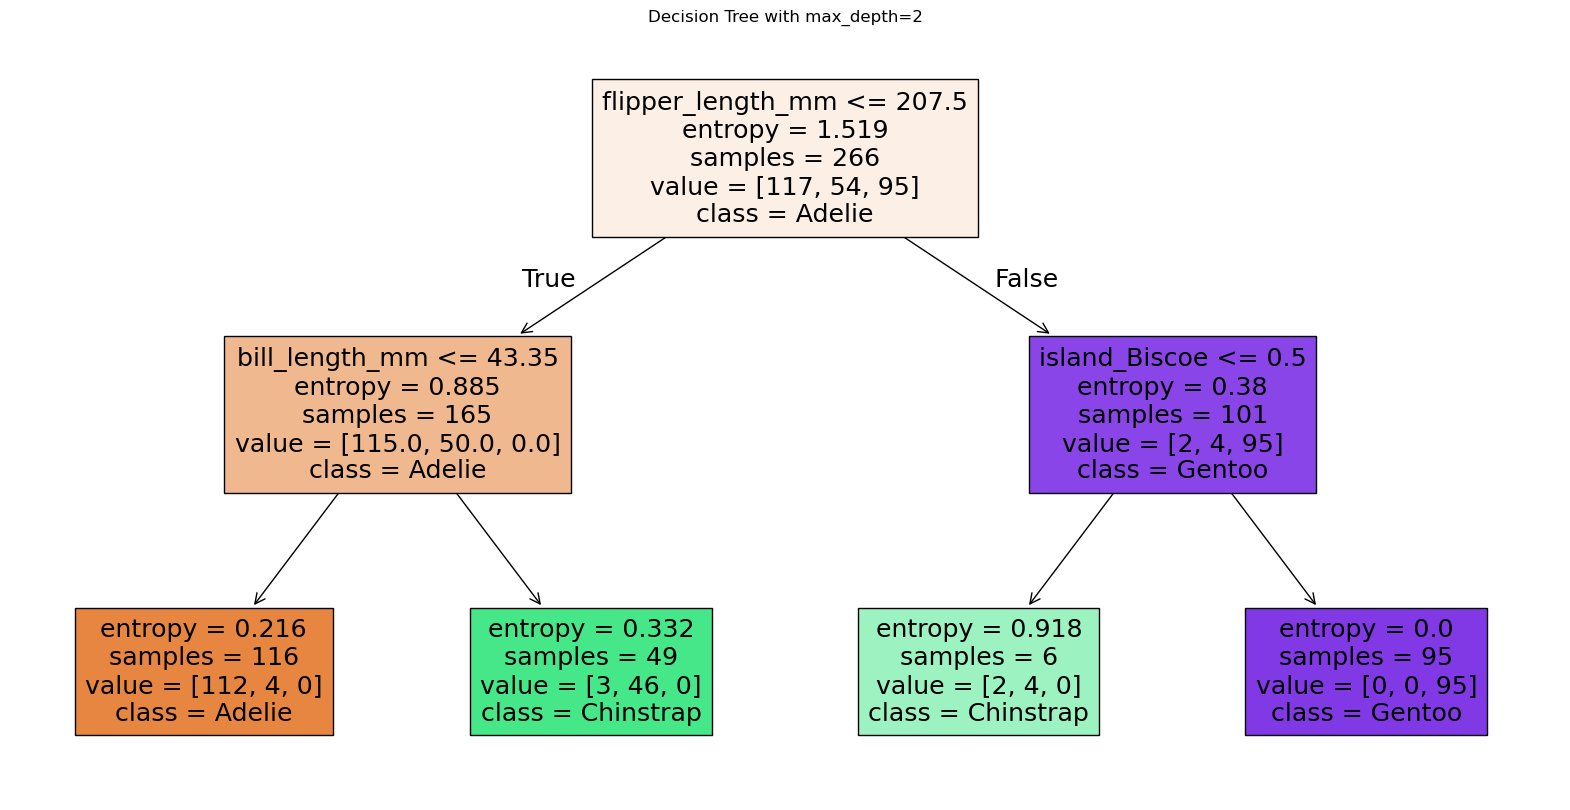

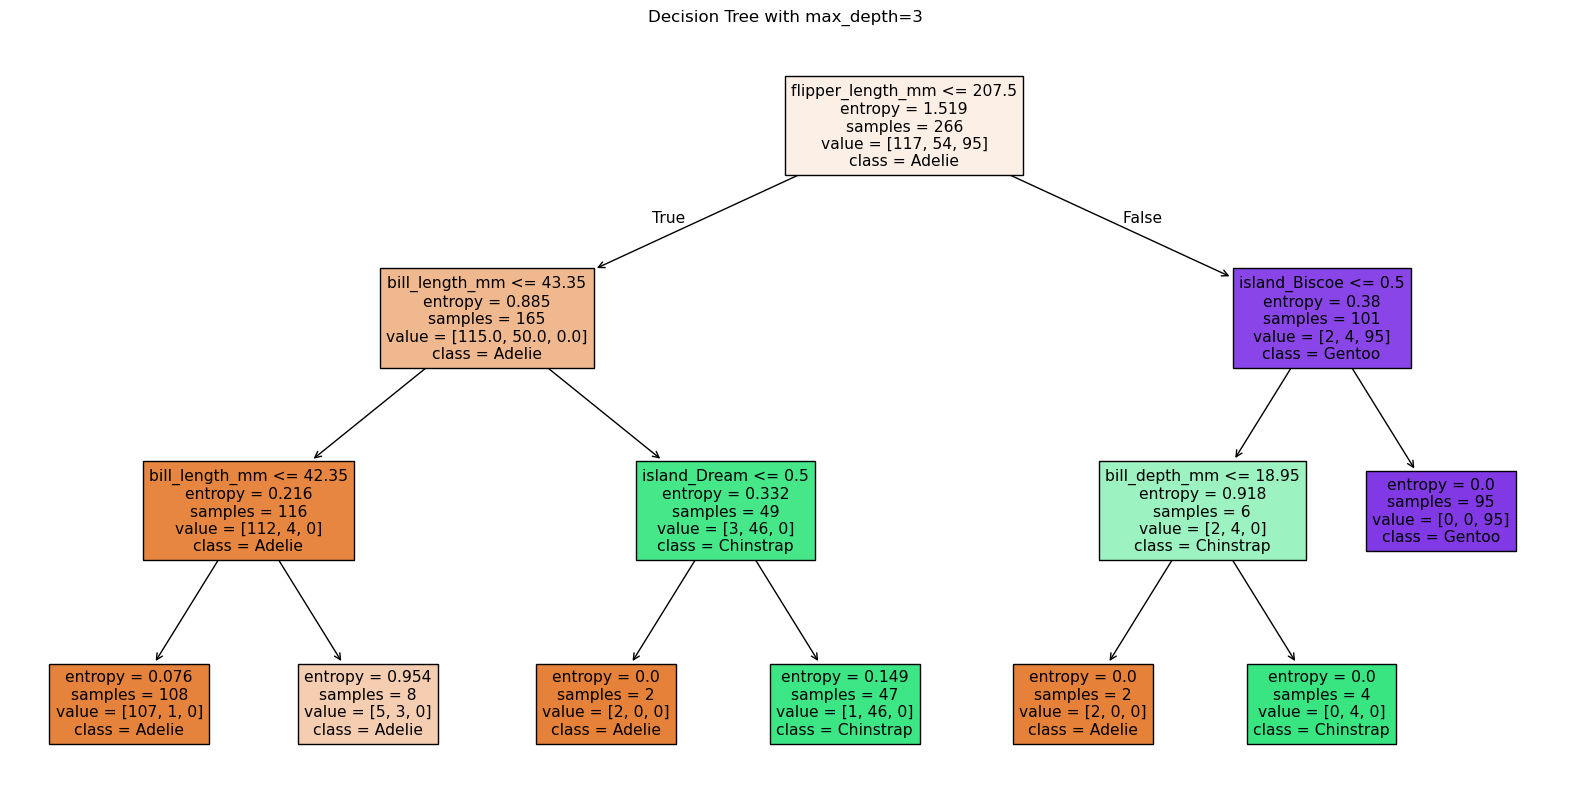

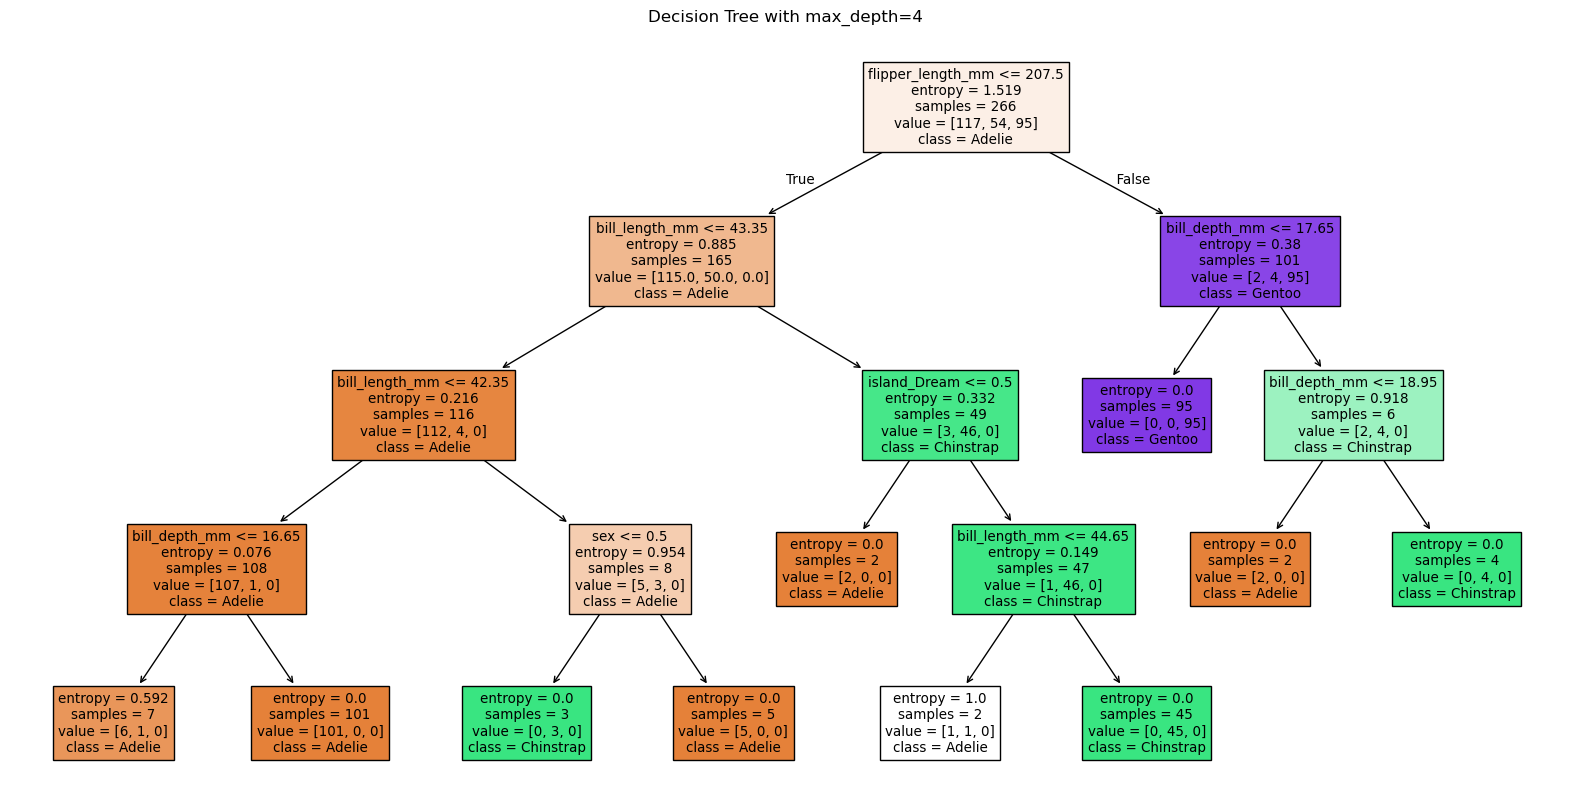

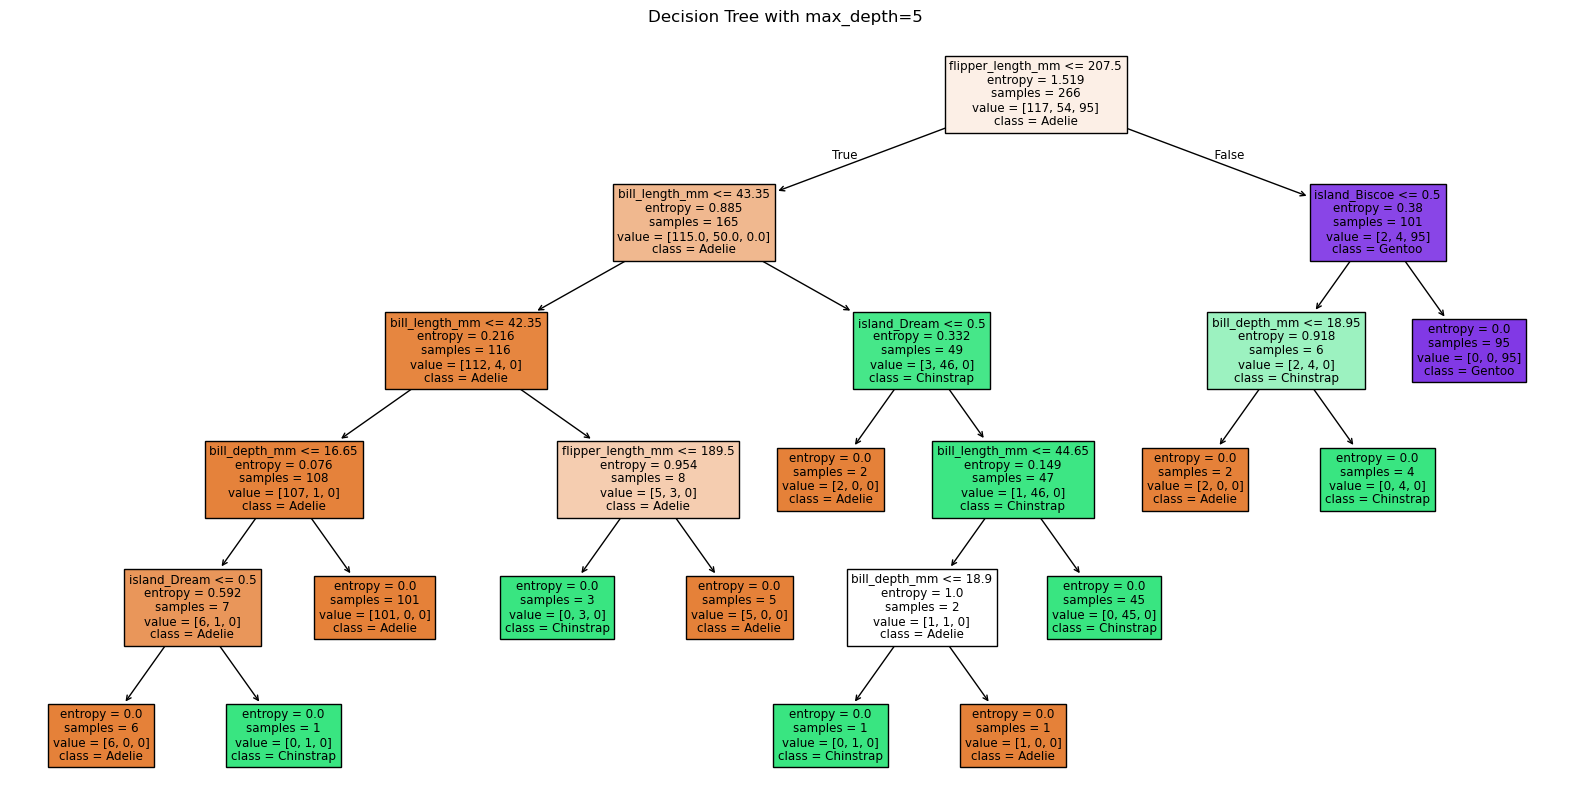

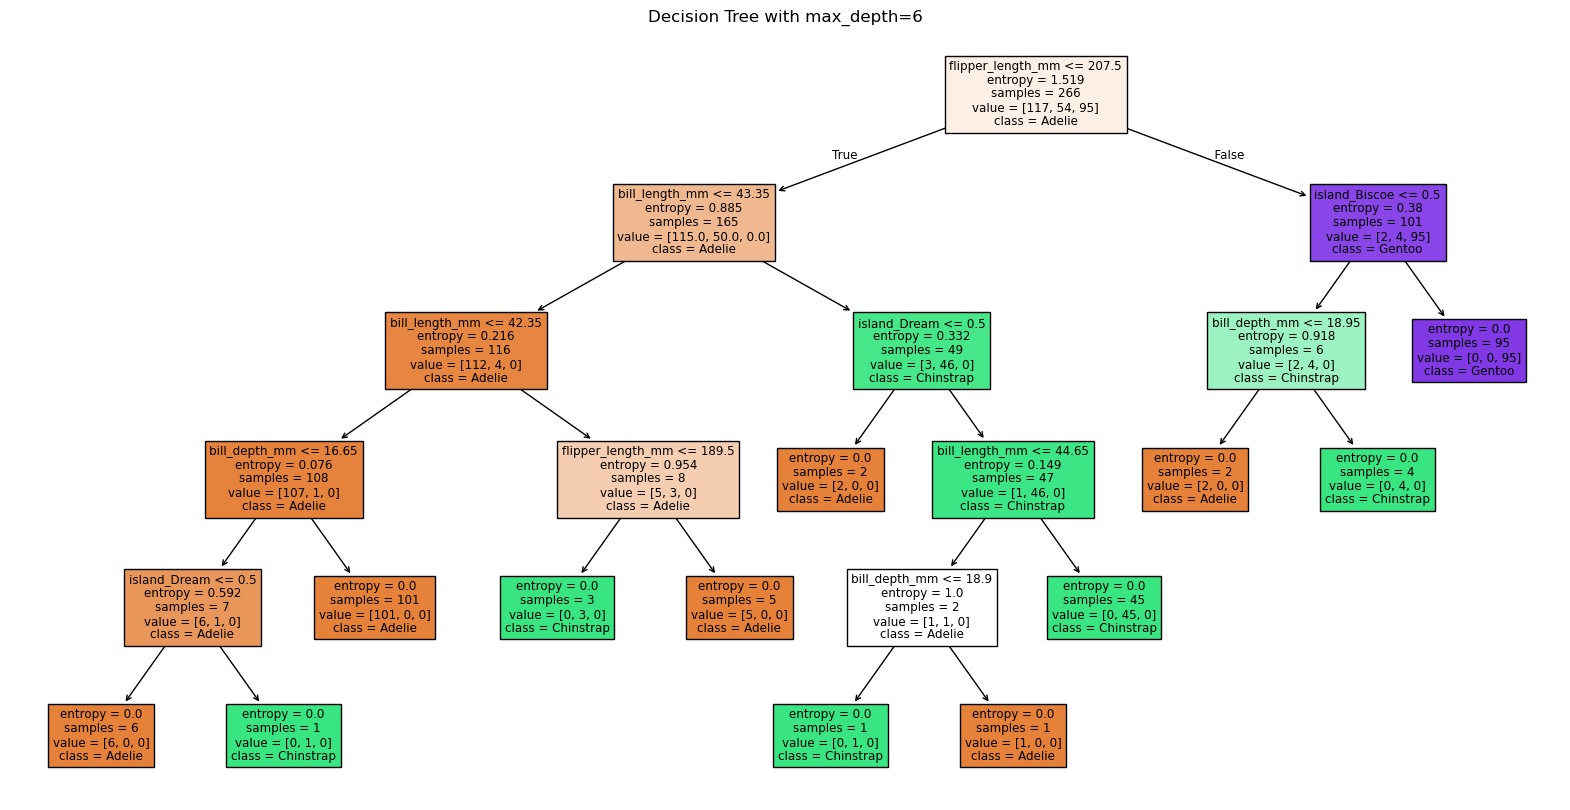

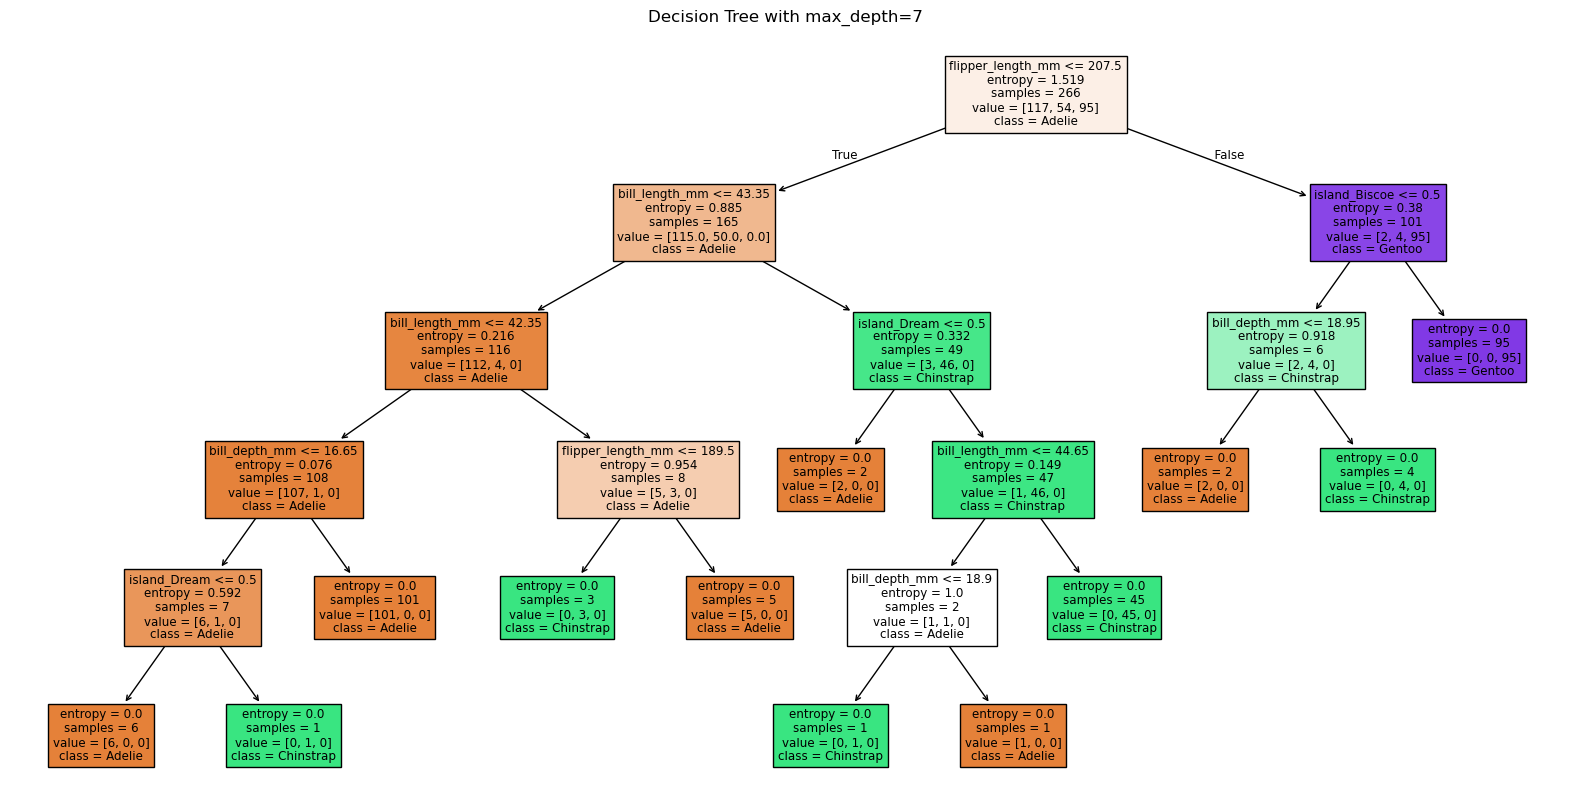

In [22]:
for depth in depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    plt.figure(figsize=(20,10))
    plot_tree(clf, feature_names=X.columns, class_names=le_species.classes_, filled=True)
    plt.title(f"Decision Tree with max_depth={depth}")
    plt.show()

## Line chart between accuracy and max_depth

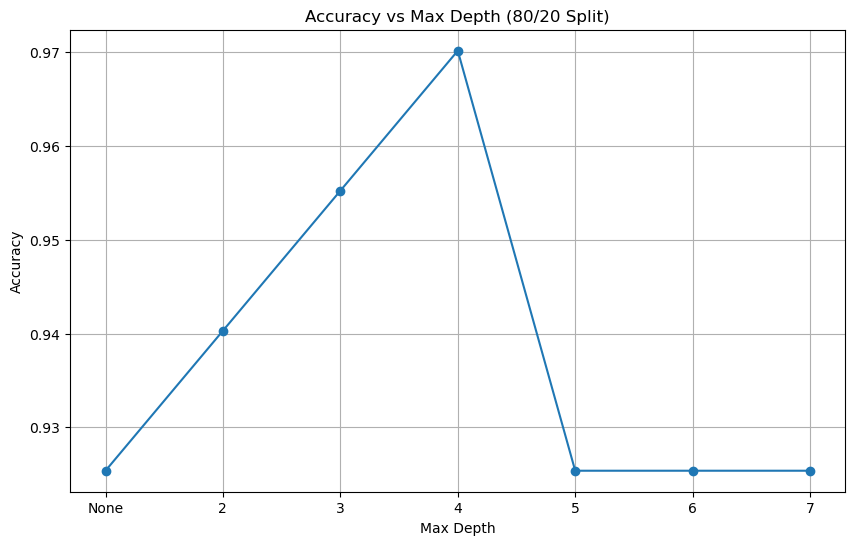

In [23]:
plt.figure(figsize=(10,6))
plt.plot(['None', 2, 3, 4, 5, 6, 7], accuracies, marker='o')
plt.title("Accuracy vs Max Depth (80/20 Split)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

## Print accuracy table

In [24]:
print("\nAccuracy by max_depth:")
for d, acc in zip(['None',2,3,4,5,6,7], accuracies):
    print(f"Depth {d}: {acc:.4f}")


Accuracy by max_depth:
Depth None: 0.9254
Depth 2: 0.9403
Depth 3: 0.9552
Depth 4: 0.9701
Depth 5: 0.9254
Depth 6: 0.9254
Depth 7: 0.9254
